In [1]:
import pandas as pd
import numpy as np 
import talib as ta
import pynance as pn
import matplotlib.pyplot as plt

In [2]:
f_data = pd.read_csv('data/yfinance_data/AAPL_historical_data.csv')
news_data= pd.read_csv('data/raw_analyst_ratings.csv')

In [3]:
f_data.head()
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
print(news_data['date'].head())
print(f_data['Date'].head())

0    2020-06-05 10:30:54-04:00
1    2020-06-03 10:45:20-04:00
2    2020-05-26 04:30:07-04:00
3    2020-05-22 12:45:06-04:00
4    2020-05-22 11:38:59-04:00
Name: date, dtype: object
0    1980-12-12
1    1980-12-15
2    1980-12-16
3    1980-12-17
4    1980-12-18
Name: Date, dtype: object


In [5]:
# Convert date columns to datetime while handling timezones automatically
news_data['Date'] = pd.to_datetime(news_data['date'], utc=True, errors='coerce')
f_data['Date'] = pd.to_datetime(f_data['Date'], utc=True, errors='coerce')


In [8]:
# Convert to datetime first (assuming UTC timezone)
news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce', utc=True)

# Now normalize and retain the timezone information
news_data['Date'] = news_data['date'].dt.normalize()


In [9]:
# Merge datasets on the 'Date' column
merged_df = pd.merge(news_data, f_data, on='Date', how='inner')


In [10]:

merged_df.head()

,Unnamed: 0,headline,url,publisher,date,stock,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,2020-06-05 00:00:00+00:00,80.837502,82.9375,80.807503,82.875,80.843407,137250400,0.0,0.0
1,1838,10 Basic Materials Stocks Moving In Friday's P...,https://www.benzinga.com/pre-market-outlook/20...,Benzinga Insights,2020-06-05 11:40:08+00:00,AA,2020-06-05 00:00:00+00:00,80.837502,82.9375,80.807503,82.875,80.843407,137250400,0.0,0.0
2,5330,Shares of several retail and apparel companies...,https://www.benzinga.com/wiim/20/06/16189953/s...,Benzinga Newsdesk,2020-06-05 14:21:08+00:00,AAN,2020-06-05 00:00:00+00:00,80.837502,82.9375,80.807503,82.875,80.843407,137250400,0.0,0.0
3,7748,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,AAWW,2020-06-05 00:00:00+00:00,80.837502,82.9375,80.807503,82.875,80.843407,137250400,0.0,0.0
4,9458,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,ABC,2020-06-05 00:00:00+00:00,80.837502,82.9375,80.807503,82.875,80.843407,137250400,0.0,0.0


In [12]:
import random
#from nltk.sentiment import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # Set the percentage of data to sample
sample_fraction = 0.1
# Select a random sample of 10% of the data
random_sample = merged_df.sample(frac=sample_fraction, random_state=42)
#Extract the 'headline' column
headlines = random_sample['headline'].tolist()
# Preview the first few random headlines 
print(headlines[:5])

['City Holding Q1 GAAP EPS $1.780 Up From $1.300 YoY', 'Investors Love The Stocks In This Emerging Market ETF', "11 Communication Services Stocks Moving In Wednesday's Pre-Market Session", 'Stocks Which Set New 52-Week Low Friday, October 26th', "Bernstein Explains Amazon's 'Prime Now' Service"]


In [13]:

# Initialize the VADER sentiment intensity analyzer 
analyzer = SentimentIntensityAnalyzer ()
#Function to get VADER sentiment
def vader_sentiment(text):
# Get the sentiment scores
    sentiment_dict = analyzer.polarity_scores (text) # Classify sentiment
    if sentiment_dict['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_dict['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
# Analyze sentiments of the random headlines
random_sample['Sentiment'] = random_sample['headline'].apply(vader_sentiment)
# Display the first 10 results
print(random_sample[['headline', 'Sentiment']].head (10))


                                                headline Sentiment
15644  City Holding Q1 GAAP EPS $1.780 Up From $1.300...   Neutral
42034  Investors Love The Stocks In This Emerging Mar...  Positive
19672  11 Communication Services Stocks Moving In Wed...   Neutral
39541  Stocks Which Set New 52-Week Low Friday, Octob...  Negative
48738    Bernstein Explains Amazon's 'Prime Now' Service   Neutral
37035  Healthways Director Shapiro Buys 1,266 Shares ...  Positive
19593  Shares of several companies in the financial s...  Negative
41645                   54 Biggest Movers From Yesterday   Neutral
35147  Post Holdings Says the Hart-Scott-Rodino Waiti...  Positive
37340          Stocks That Hit 52-Week Lows On Wednesday  Negative


In [15]:

# Calculate daily returns as percentage change
f_data['Daily_Returns'] = f_data['Close'].pct_change() * 100


In [19]:
print(f_data['Daily_Returns'])

0             NaN
1       -5.217061
2       -7.339788
3        2.475091
4        2.899246
           ...   
10993   -2.875428
10994   -0.480456
10995    0.216102
10996    0.128463
10997    0.256597
Name: Daily_Returns, Length: 10998, dtype: float64


In [22]:
sia = SentimentIntensityAnalyzer()

random_sample['vader_compound'] = random_sample['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])



In [24]:
# Group by Date and compute the average sentiment score for each day
daily_sentiment = random_sample.groupby('Date')['vader_compound'].mean().reset_index()
daily_sentiment.columns = ['Date', 'Average_Sentiment']


In [25]:
merged_data = pd.merge(f_data[['Date', 'Daily_Returns']], daily_sentiment, on='Date', how='inner')


In [28]:
from scipy.stats import pearsonr, spearmanr

# Pearson correlation
pearson_corr, p_value = pearsonr(merged_data['Daily_Returns'], merged_data['Average_Sentiment'])
print(f"Pearson correlation coefficient: {pearson_corr}, p-value: {p_value}")

# Spearman rank correlation
spearman_corr, p_value = spearmanr(merged_data['Daily_Returns'], merged_data['Average_Sentiment'])
print(f"Spearman correlation coefficient: {spearman_corr}, p-value: {p_value}")


Pearson correlation coefficient: 0.04426615442355362, p-value: 0.10172349079771455
Spearman correlation coefficient: 0.04048129324798263, p-value: 0.13452199032019108


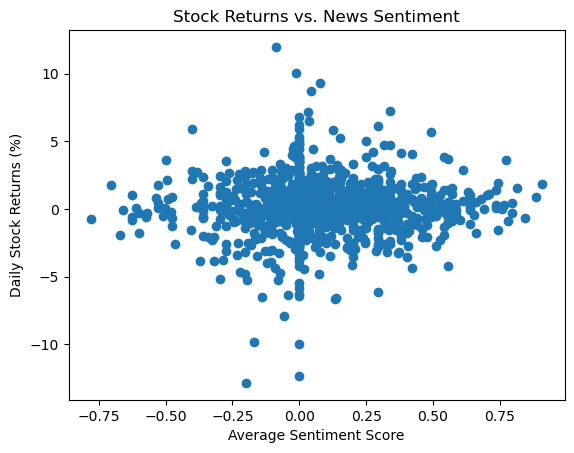

In [29]:

plt.scatter(merged_data['Average_Sentiment'], merged_data['Daily_Returns'])
plt.title("Stock Returns vs. News Sentiment")
plt.xlabel("Average Sentiment Score")
plt.ylabel("Daily Stock Returns (%)")
plt.show()
